In [1]:
import pandas as pd
import numpy as np
import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('D:/DS/Loan Prediction/Datasets/train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('D:/DS/Loan Prediction/Datasets/test_Y3wMUE5_7gLdaTN.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train.columns = train.columns.to_series().apply(lambda x: x.strip())

In [11]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0]) 
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mode()[0])
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

In [12]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

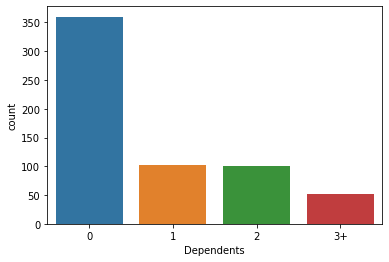

In [13]:
sns.countplot(x = 'Dependents', data = train)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

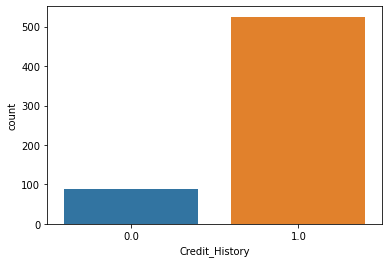

In [14]:
sns.countplot(x = 'Credit_History', data = train)

In [15]:
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

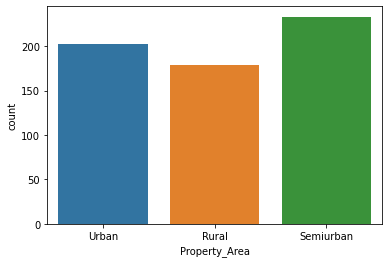

In [16]:
sns.countplot(x = 'Property_Area', data = train)

<AxesSubplot:xlabel='ApplicantIncome'>

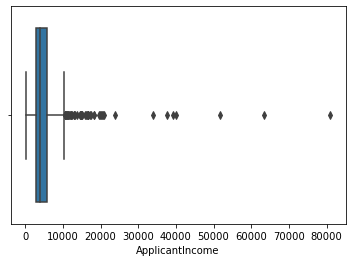

In [17]:
sns.boxplot(x = 'ApplicantIncome', data = train)

<AxesSubplot:xlabel='LoanAmount'>

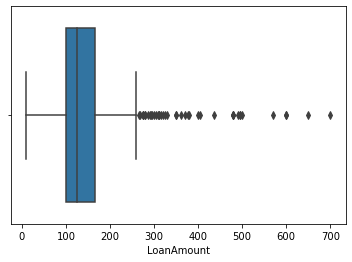

In [18]:
sns.boxplot(x = 'LoanAmount', data = train)

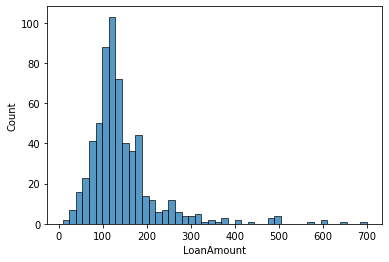

In [19]:
grid = sns.histplot(x = 'LoanAmount', data = train)

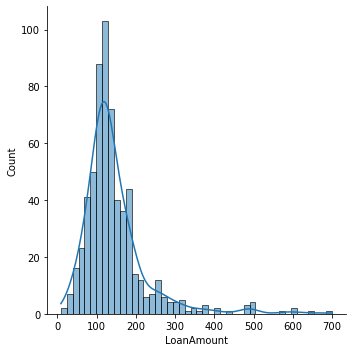

In [20]:
sns.displot(train['LoanAmount'], kde = True, label = 'Skewness: %.2f'%(train['LoanAmount'].skew()))

In [21]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])

<AxesSubplot:>

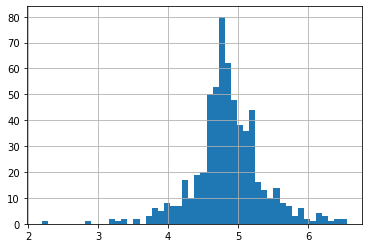

In [22]:
train['LoanAmount_log'].hist(bins = 50)

In [23]:
train['ApplicantIncome'] = train['ApplicantIncome'].astype('float64')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     614 non-null    float64
dtypes: float64(6), object(8)
memory usage: 67.3+ KB


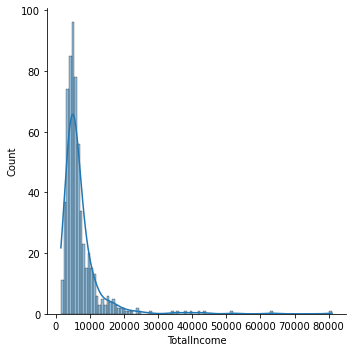

In [24]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
sns.displot(train['TotalIncome'],kde = True)

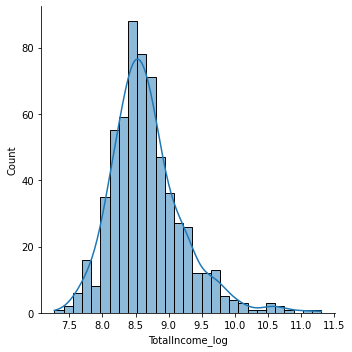

In [25]:
train['TotalIncome_log'] = np.log(train['TotalIncome'])
sns.displot(train['TotalIncome_log'],kde = True)

In [26]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,120.0,360.0,1.0,Urban,Y,4.787492,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     614 non-null    float64
 14  TotalIncome        614 non-null    float64
 15  TotalIncome_log    614 non-null    float64
dtypes: float64(8), object(8)
m

In [28]:
categorical_columns = train.select_dtypes('object').columns.to_list()
categorical_columns[1:]

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [29]:
train['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [30]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [31]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols2 = ['Gender','Married','Education','Self_Employed','Loan_Status']
for col in cat_cols2:
    train[col] = le.fit_transform(train[col].astype(str))
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int32  
 13  LoanAmount_log     614 non-null    float64
 14  TotalIncome        614 non-null    float64
 15  TotalIncome_log    614 non-null    float64
dtypes: float64(8), int32(5), o

In [33]:
train = pd.get_dummies(train, columns = ['Dependents'],prefix = 'Dep')
train = pd.get_dummies(train, columns = ['Property_Area'],prefix = 'PA')
train.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,LoanAmount_log,TotalIncome,TotalIncome_log,Dep_0,Dep_1,Dep_2,Dep_3+,PA_Rural,PA_Semiurban,PA_Urban
0,LP001002,1,0,0,0,5849.0,0.0,120.0,360.0,1.0,...,4.787492,5849.0,8.674026,1,0,0,0,0,0,1
1,LP001003,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,...,4.852030,6091.0,8.714568,0,1,0,0,1,0,0
2,LP001005,1,1,0,1,3000.0,0.0,66.0,360.0,1.0,...,4.189655,3000.0,8.006368,1,0,0,0,0,0,1
3,LP001006,1,1,1,0,2583.0,2358.0,120.0,360.0,1.0,...,4.787492,4941.0,8.505323,1,0,0,0,0,0,1
4,LP001008,1,0,0,0,6000.0,0.0,141.0,360.0,1.0,...,4.948760,6000.0,8.699515,1,0,0,0,0,0,1


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Loan_Status        614 non-null    int32  
 11  LoanAmount_log     614 non-null    float64
 12  TotalIncome        614 non-null    float64
 13  TotalIncome_log    614 non-null    float64
 14  Dep_0              614 non-null    uint8  
 15  Dep_1              614 non-null    uint8  
 16  Dep_2              614 non

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Loan_Status        614 non-null    int32  
 11  LoanAmount_log     614 non-null    float64
 12  TotalIncome        614 non-null    float64
 13  TotalIncome_log    614 non-null    float64
 14  Dep_0              614 non-null    uint8  
 15  Dep_1              614 non-null    uint8  
 16  Dep_2              614 non

In [36]:
train.drop('ApplicantIncome',inplace = True,axis = 1)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Loan_Status        614 non-null    int32  
 10  LoanAmount_log     614 non-null    float64
 11  TotalIncome        614 non-null    float64
 12  TotalIncome_log    614 non-null    float64
 13  Dep_0              614 non-null    uint8  
 14  Dep_1              614 non-null    uint8  
 15  Dep_2              614 non-null    uint8  
 16  Dep_3+             614 non

In [38]:
train.drop('CoapplicantIncome',inplace = True,axis = 1)
train.drop('TotalIncome',inplace = True,axis = 1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Gender            614 non-null    int32  
 2   Married           614 non-null    int32  
 3   Education         614 non-null    int32  
 4   Self_Employed     614 non-null    int32  
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    float64
 8   Loan_Status       614 non-null    int32  
 9   LoanAmount_log    614 non-null    float64
 10  TotalIncome_log   614 non-null    float64
 11  Dep_0             614 non-null    uint8  
 12  Dep_1             614 non-null    uint8  
 13  Dep_2             614 non-null    uint8  
 14  Dep_3+            614 non-null    uint8  
 15  PA_Rural          614 non-null    uint8  
 16  PA_Semiurban      614 non-null    uint8  
 1

In [39]:
train.drop('LoanAmount',inplace = True, axis = 1)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Gender            614 non-null    int32  
 2   Married           614 non-null    int32  
 3   Education         614 non-null    int32  
 4   Self_Employed     614 non-null    int32  
 5   Loan_Amount_Term  614 non-null    float64
 6   Credit_History    614 non-null    float64
 7   Loan_Status       614 non-null    int32  
 8   LoanAmount_log    614 non-null    float64
 9   TotalIncome_log   614 non-null    float64
 10  Dep_0             614 non-null    uint8  
 11  Dep_1             614 non-null    uint8  
 12  Dep_2             614 non-null    uint8  
 13  Dep_3+            614 non-null    uint8  
 14  PA_Rural          614 non-null    uint8  
 15  PA_Semiurban      614 non-null    uint8  
 16  PA_Urban          614 non-null    uint8  
dt

In [41]:
x = train.iloc[:,1:].drop('Loan_Status',axis = 1)
y = train['Loan_Status']

In [42]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(train_x, train_y)
predict_y_dc = dc.predict(test_x)
print(classification_report(test_y,predict_y_dc))
print('Accuracy: ',accuracy_score(predict_y_dc,test_y))

              precision    recall  f1-score   support

           0       0.45      0.63      0.52        51
           1       0.83      0.71      0.77       134

    accuracy                           0.69       185
   macro avg       0.64      0.67      0.65       185
weighted avg       0.73      0.69      0.70       185

Accuracy:  0.6864864864864865


In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
predict_y_rf = rf.predict(test_x)
print(classification_report(test_y, predict_y_rf))
print('Accuracy: ',accuracy_score(predict_y_rf, test_y))

              precision    recall  f1-score   support

           0       0.65      0.43      0.52        51
           1       0.81      0.91      0.86       134

    accuracy                           0.78       185
   macro avg       0.73      0.67      0.69       185
weighted avg       0.76      0.78      0.76       185

Accuracy:  0.7783783783783784


In [45]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(train_x,train_y)
predict_y_lg = lg.predict(test_x)
print(classification_report(test_y,predict_y_lg))
print('Accuracy: ',accuracy_score(predict_y_lg,test_y))

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

Accuracy:  0.827027027027027


C:\Users\doome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Check and Improve above

In [46]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_x,train_y)
predict_y_svc = svc.predict(test_x)
print(classification_report(test_y,predict_y_svc))
print('Accuracy: ',accuracy_score(predict_y_svc,test_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.72      1.00      0.84       134

    accuracy                           0.72       185
   macro avg       0.36      0.50      0.42       185
weighted avg       0.52      0.72      0.61       185

Accuracy:  0.7243243243243244


C:\Users\doome\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\doome\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\doome\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
rf2=RandomForestClassifier(n_estimators = 100)
rf2.fit(train_x,train_y)
predict_y_rf2 = rf2.predict(test_x)
print(classification_report(test_y,predict_y_rf2))
print('Accuracy: ',accuracy_score(predict_y_rf2,test_y))

              precision    recall  f1-score   support

           0       0.66      0.45      0.53        51
           1       0.81      0.91      0.86       134

    accuracy                           0.78       185
   macro avg       0.74      0.68      0.70       185
weighted avg       0.77      0.78      0.77       185

Accuracy:  0.7837837837837838


In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_x,train_y)
predict_y_knn = knn.predict(test_x)
print(classification_report(test_y,predict_y_knn))
print('Accuracy: ',accuracy_score(predict_y_knn,test_y))

              precision    recall  f1-score   support

           0       0.67      0.35      0.46        51
           1       0.79      0.93      0.86       134

    accuracy                           0.77       185
   macro avg       0.73      0.64      0.66       185
weighted avg       0.76      0.77      0.75       185

Accuracy:  0.772972972972973


In [56]:
from catboost import CatBoostClassifier

In [57]:
ctb = CatBoostClassifier()
ctb.fit(train_x,train_y)
predict_y_ctb = ctb.predict(test_x)
print('Accuracy: ',accuracy_score(predict_y_ctb,test_y))

Learning rate set to 0.007178
0:	learn: 0.6898197	total: 174ms	remaining: 2m 53s
1:	learn: 0.6860786	total: 176ms	remaining: 1m 27s
2:	learn: 0.6824328	total: 181ms	remaining: 1m
3:	learn: 0.6792051	total: 182ms	remaining: 45.3s
4:	learn: 0.6756997	total: 184ms	remaining: 36.5s
5:	learn: 0.6724878	total: 185ms	remaining: 30.7s
6:	learn: 0.6687827	total: 187ms	remaining: 26.5s
7:	learn: 0.6653615	total: 188ms	remaining: 23.4s
8:	learn: 0.6624636	total: 189ms	remaining: 20.8s
9:	learn: 0.6593411	total: 191ms	remaining: 18.9s
10:	learn: 0.6561495	total: 192ms	remaining: 17.3s
11:	learn: 0.6530070	total: 195ms	remaining: 16.1s
12:	learn: 0.6499314	total: 197ms	remaining: 15s
13:	learn: 0.6468407	total: 199ms	remaining: 14s
14:	learn: 0.6439488	total: 200ms	remaining: 13.1s
15:	learn: 0.6409858	total: 202ms	remaining: 12.4s
16:	learn: 0.6380842	total: 203ms	remaining: 11.8s
17:	learn: 0.6352140	total: 205ms	remaining: 11.2s
18:	learn: 0.6327273	total: 206ms	remaining: 10.6s
19:	learn: 0.629

182:	learn: 0.4428473	total: 512ms	remaining: 2.29s
183:	learn: 0.4424509	total: 514ms	remaining: 2.28s
184:	learn: 0.4421199	total: 516ms	remaining: 2.27s
185:	learn: 0.4417266	total: 517ms	remaining: 2.26s
186:	learn: 0.4410864	total: 519ms	remaining: 2.25s
187:	learn: 0.4403106	total: 520ms	remaining: 2.25s
188:	learn: 0.4396504	total: 522ms	remaining: 2.24s
189:	learn: 0.4392282	total: 523ms	remaining: 2.23s
190:	learn: 0.4388007	total: 525ms	remaining: 2.22s
191:	learn: 0.4383300	total: 527ms	remaining: 2.22s
192:	learn: 0.4380595	total: 528ms	remaining: 2.21s
193:	learn: 0.4377904	total: 529ms	remaining: 2.2s
194:	learn: 0.4374145	total: 531ms	remaining: 2.19s
195:	learn: 0.4369835	total: 533ms	remaining: 2.19s
196:	learn: 0.4364310	total: 535ms	remaining: 2.18s
197:	learn: 0.4359277	total: 536ms	remaining: 2.17s
198:	learn: 0.4354984	total: 538ms	remaining: 2.17s
199:	learn: 0.4352190	total: 540ms	remaining: 2.16s
200:	learn: 0.4348373	total: 541ms	remaining: 2.15s
201:	learn: 0

370:	learn: 0.3780251	total: 858ms	remaining: 1.45s
371:	learn: 0.3778142	total: 859ms	remaining: 1.45s
372:	learn: 0.3774952	total: 861ms	remaining: 1.45s
373:	learn: 0.3772143	total: 862ms	remaining: 1.44s
374:	learn: 0.3768858	total: 864ms	remaining: 1.44s
375:	learn: 0.3767065	total: 866ms	remaining: 1.44s
376:	learn: 0.3763344	total: 867ms	remaining: 1.43s
377:	learn: 0.3760352	total: 869ms	remaining: 1.43s
378:	learn: 0.3757610	total: 870ms	remaining: 1.43s
379:	learn: 0.3755544	total: 872ms	remaining: 1.42s
380:	learn: 0.3753275	total: 874ms	remaining: 1.42s
381:	learn: 0.3751450	total: 875ms	remaining: 1.42s
382:	learn: 0.3749372	total: 877ms	remaining: 1.41s
383:	learn: 0.3746057	total: 878ms	remaining: 1.41s
384:	learn: 0.3745461	total: 879ms	remaining: 1.4s
385:	learn: 0.3744451	total: 881ms	remaining: 1.4s
386:	learn: 0.3741967	total: 882ms	remaining: 1.4s
387:	learn: 0.3740843	total: 883ms	remaining: 1.39s
388:	learn: 0.3739419	total: 885ms	remaining: 1.39s
389:	learn: 0.3

574:	learn: 0.3344430	total: 1.47s	remaining: 1.09s
575:	learn: 0.3339924	total: 1.47s	remaining: 1.08s
576:	learn: 0.3337810	total: 1.48s	remaining: 1.08s
577:	learn: 0.3335504	total: 1.48s	remaining: 1.08s
578:	learn: 0.3333484	total: 1.49s	remaining: 1.08s
579:	learn: 0.3330560	total: 1.49s	remaining: 1.08s
580:	learn: 0.3329279	total: 1.5s	remaining: 1.08s
581:	learn: 0.3326901	total: 1.5s	remaining: 1.08s
582:	learn: 0.3324487	total: 1.51s	remaining: 1.08s
583:	learn: 0.3322445	total: 1.51s	remaining: 1.08s
584:	learn: 0.3321851	total: 1.52s	remaining: 1.08s
585:	learn: 0.3320040	total: 1.52s	remaining: 1.08s
586:	learn: 0.3318666	total: 1.53s	remaining: 1.07s
587:	learn: 0.3315267	total: 1.53s	remaining: 1.07s
588:	learn: 0.3313304	total: 1.53s	remaining: 1.07s
589:	learn: 0.3309657	total: 1.54s	remaining: 1.07s
590:	learn: 0.3308131	total: 1.54s	remaining: 1.06s
591:	learn: 0.3306571	total: 1.54s	remaining: 1.06s
592:	learn: 0.3304025	total: 1.54s	remaining: 1.06s
593:	learn: 0.

772:	learn: 0.2972211	total: 1.82s	remaining: 535ms
773:	learn: 0.2969504	total: 1.82s	remaining: 532ms
774:	learn: 0.2968225	total: 1.82s	remaining: 529ms
775:	learn: 0.2965129	total: 1.82s	remaining: 527ms
776:	learn: 0.2964445	total: 1.83s	remaining: 524ms
777:	learn: 0.2962146	total: 1.83s	remaining: 521ms
778:	learn: 0.2960624	total: 1.83s	remaining: 519ms
779:	learn: 0.2959381	total: 1.83s	remaining: 516ms
780:	learn: 0.2958955	total: 1.83s	remaining: 514ms
781:	learn: 0.2957799	total: 1.83s	remaining: 511ms
782:	learn: 0.2955348	total: 1.83s	remaining: 509ms
783:	learn: 0.2954039	total: 1.84s	remaining: 507ms
784:	learn: 0.2953166	total: 1.84s	remaining: 504ms
785:	learn: 0.2950075	total: 1.84s	remaining: 502ms
786:	learn: 0.2947875	total: 1.84s	remaining: 499ms
787:	learn: 0.2946887	total: 1.85s	remaining: 497ms
788:	learn: 0.2945745	total: 1.85s	remaining: 494ms
789:	learn: 0.2944250	total: 1.85s	remaining: 491ms
790:	learn: 0.2941133	total: 1.85s	remaining: 489ms
791:	learn: 

963:	learn: 0.2657039	total: 2.17s	remaining: 81.1ms
964:	learn: 0.2654435	total: 2.17s	remaining: 78.9ms
965:	learn: 0.2652241	total: 2.18s	remaining: 76.6ms
966:	learn: 0.2649907	total: 2.18s	remaining: 74.3ms
967:	learn: 0.2648167	total: 2.18s	remaining: 72ms
968:	learn: 0.2647391	total: 2.18s	remaining: 69.8ms
969:	learn: 0.2646469	total: 2.18s	remaining: 67.5ms
970:	learn: 0.2643183	total: 2.18s	remaining: 65.2ms
971:	learn: 0.2640721	total: 2.19s	remaining: 63ms
972:	learn: 0.2639463	total: 2.19s	remaining: 60.7ms
973:	learn: 0.2637670	total: 2.19s	remaining: 58.4ms
974:	learn: 0.2635300	total: 2.19s	remaining: 56.2ms
975:	learn: 0.2633731	total: 2.19s	remaining: 53.9ms
976:	learn: 0.2632116	total: 2.19s	remaining: 51.6ms
977:	learn: 0.2630052	total: 2.19s	remaining: 49.4ms
978:	learn: 0.2627641	total: 2.2s	remaining: 47.1ms
979:	learn: 0.2624781	total: 2.2s	remaining: 44.9ms
980:	learn: 0.2623270	total: 2.2s	remaining: 42.6ms
981:	learn: 0.2620134	total: 2.2s	remaining: 40.4ms
9